In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part A

In [2]:
data = pd.read_csv('wdbc.data.txt',sep=',', header=None)
X = data[data[1] == 0]
Y = data[data[1] == 1]
X = X.drop(1, axis=1).drop(0, axis=1)
Y = Y.drop(1, axis=1).drop(0, axis=1)
X = X.T
Y = Y.T

## Part B

In [3]:
"""
Computing S_b and S_w
"""
mu_1 = X.mean(axis=1)
mu_2 = Y.mean(axis=1)
S_b = (mu_1 - mu_2)*(mu_1 - mu_2).T
S_b = S_b.values
X_o = X.apply(lambda x: x - mu_1, axis=0)
Y_o = Y.apply(lambda y: y - mu_2, axis=0)
X_prod = np.asmatrix(X_o) * np.asmatrix(X_o.T)
Y_prod = np.asmatrix(Y_o) * np.asmatrix(Y_o.T)
S_w = X_prod + Y_prod

In [4]:
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(S_w),S_w))

In [5]:
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
v = eigen_pairs[0][1][:,np.newaxis].real

In [6]:
v

matrix([[ 6.42401563e-03, -1.02691127e-03, -6.46220984e-04,
         -2.98990310e-05, -3.17072233e-01,  9.80753945e-03,
          2.64555331e-02, -1.70234735e-01,  1.05196252e-01,
          4.59585807e-01, -1.01865742e-02,  2.10855802e-04,
          6.10651115e-04,  4.48716491e-05, -3.60709163e-02,
         -1.08329976e-01, -7.16375130e-02,  2.42282047e-01,
         -2.23018329e-02,  7.32660671e-01,  6.52750664e-04,
          3.98270434e-05, -7.90861756e-05, -1.56488982e-06,
          3.03996503e-02,  2.00277521e-02,  1.83695891e-03,
         -2.09200189e-02,  5.74125668e-04, -1.77008124e-01]])

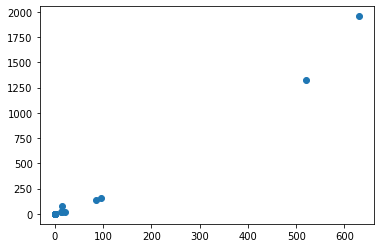

In [7]:
_ = plt.scatter(X[20], Y[1])

In [8]:
trans = X.T.dot(v.T)

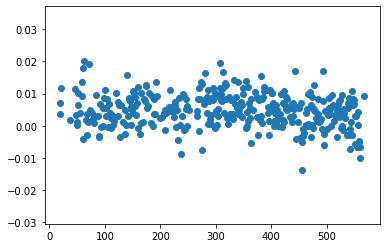

In [9]:
_ = plt.scatter(trans.index, trans)
_ = plt.plot()

In [26]:
x_proj = X.dot(v.T)

ValueError: Dot product shape mismatch, (30, 357) vs (30, 1)

In [11]:
y_proj = np.dot(Y.T, v.T)

ValueError: x and y must be the same size

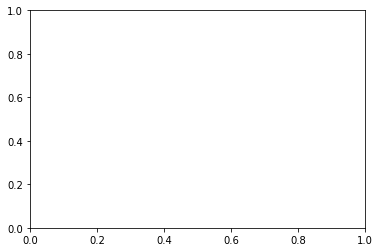

In [12]:
plt.scatter(x_proj, y_proj)

In [13]:
y_proj.shape

(212, 1)

In [14]:
x_proj.shape

(357, 1)

In [15]:
plt.scatter(x_proj.index, x_proj)

AttributeError: 'matrix' object has no attribute 'index'

ValueError: x and y must be the same size

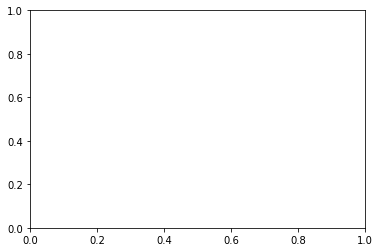

In [16]:
plt.scatter(v, x_proj)

In [17]:
v

matrix([[ 6.42401563e-03, -1.02691127e-03, -6.46220984e-04,
         -2.98990310e-05, -3.17072233e-01,  9.80753945e-03,
          2.64555331e-02, -1.70234735e-01,  1.05196252e-01,
          4.59585807e-01, -1.01865742e-02,  2.10855802e-04,
          6.10651115e-04,  4.48716491e-05, -3.60709163e-02,
         -1.08329976e-01, -7.16375130e-02,  2.42282047e-01,
         -2.23018329e-02,  7.32660671e-01,  6.52750664e-04,
          3.98270434e-05, -7.90861756e-05, -1.56488982e-06,
          3.03996503e-02,  2.00277521e-02,  1.83695891e-03,
         -2.09200189e-02,  5.74125668e-04, -1.77008124e-01]])

In [18]:
x_proj.shape

(357, 1)

In [33]:
x_proj[:,0]

matrix([[ 3.71919150e-03],
        [ 7.17225296e-03],
        [ 1.16614717e-02],
        [ 1.72198069e-03],
        [ 1.14144609e-02],
        [ 3.38933772e-03],
        [ 1.31197191e-04],
        [ 1.17373692e-03],
        [ 6.56388553e-03],
        [ 1.01575036e-02],
        [ 4.07349732e-03],
        [ 9.24767566e-03],
        [ 1.34624453e-02],
        [ 1.79559639e-02],
        [-3.96802515e-03],
        [ 2.02372343e-02],
        [ 1.74326446e-03],
        [ 3.59749851e-03],
        [-2.85093274e-03],
        [ 1.18607928e-03],
        [ 1.91047834e-02],
        [ 4.74487745e-03],
        [ 4.09562216e-03],
        [ 2.17552293e-03],
        [ 1.00512895e-03],
        [ 2.99804209e-03],
        [ 9.51721786e-03],
        [ 2.93784570e-03],
        [-3.26088661e-03],
        [-3.43043805e-03],
        [ 6.77840986e-03],
        [-3.32034707e-04],
        [ 5.62410451e-03],
        [-1.23899554e-04],
        [ 8.71557397e-03],
        [ 1.11000053e-02],
        [ 5.43021302e-03],
 

In [19]:
y_proj.shape

(212, 1)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 357 and the array at index 1 has size 1

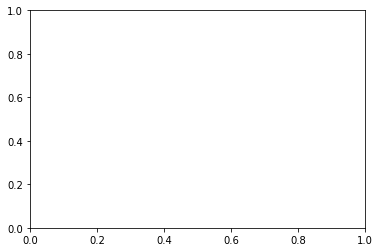

In [32]:
plt.scatter(list(range(len(x_proj))), x_proj[:,0], marker='')